In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


The dataset appears to be related to Apple Inc.'s stock prices, sourced from **[Specify Data Source]**.

Convert the Date column to a datetime format for proper analysis and visualization.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


#Summary Statistics:

Stock Prices (Open, High, Low, Close, Adj Close)

The mean closing price is 126.74 with a std deviation of 50.58.

The minimum closing price recorded is 55.79, and the maximum is 291.52.

The price distribution shows a right-skewed trend, indicating an increasing trend over time.

#Volume

The average trading volume is around 59.49 million shares per day.

The maximum trading volume recorded is 376.53 million shares, indicating high volatility on some days.

##Visualizing trends: Closing price trends, moving averages, and volume trends.

##Correlation analysis: Understanding relationships between stock price variables.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
plt.style.use('seaborn-v0_8-darkgrid')


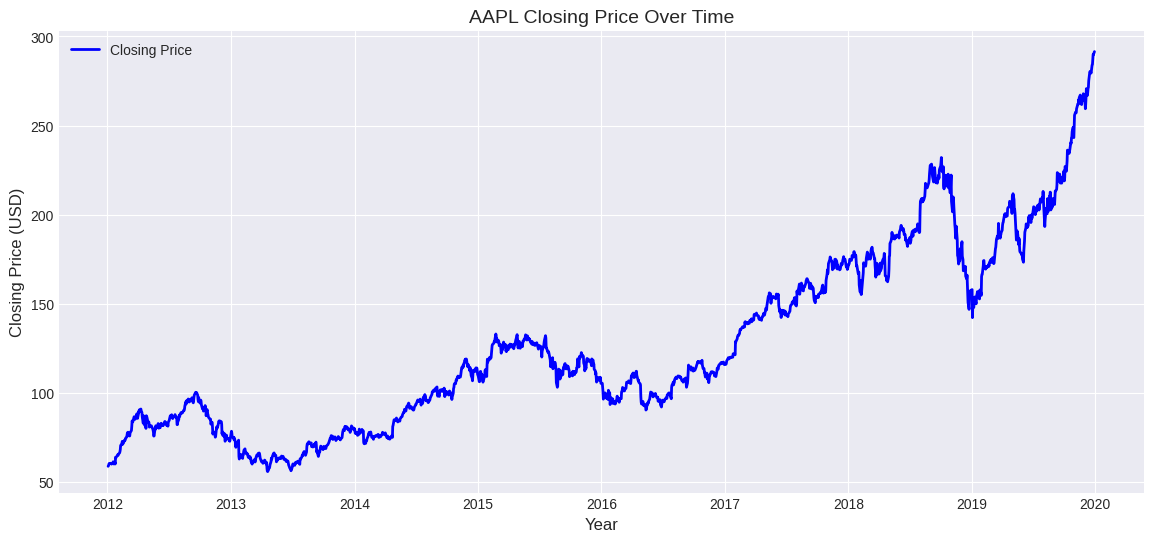

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', linewidth=2)
plt.title("AAPL Closing Price Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Closing Price (USD)", fontsize=12)
plt.legend()
plt.show()

##Observations from Closing Price Trend:

The AAPL closing price has shown a significant upward trend over time.

There are periods of sharp increases and corrections, indicating market volatility.

The stock price started around $55-$60 in 2012 and peaked at around $290+ in recent years.

###Moving Average Analysis (Short-term and Long-term trends).

###Volume Trend Analysis.

###Correlation Heatmap to check relationships between stock price variables.

In [12]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

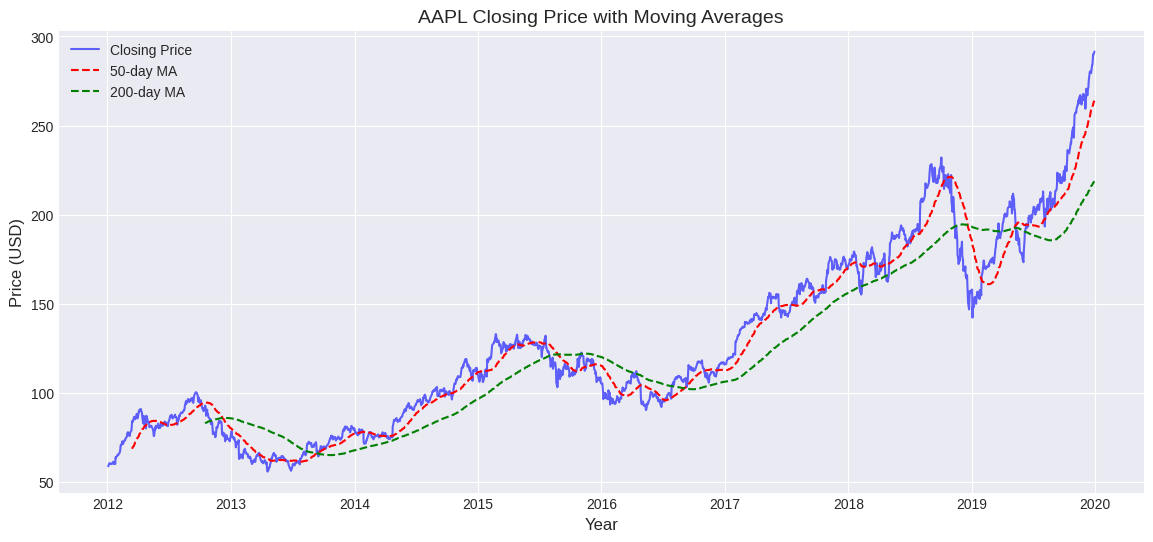

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['MA_50'], label='50-day MA', color='red', linestyle='dashed')
plt.plot(df.index, df['MA_200'], label='200-day MA', color='green', linestyle='dashed')
plt.title("AAPL Closing Price with Moving Averages", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend()
plt.show()

##Moving Average Analysis:

The 50-day Moving Average (Red) follows short-term price trends.

The 200-day Moving Average (Green) smooths out long-term trends.

##Golden Cross & Death Cross:

When the 50-day MA crosses above the 200-day MA, it signals a bullish trend (Golden Cross).

When the 50-day MA crosses below the 200-day MA, it signals a bearish trend (Death Cross).

This confirms long-term growth with periodic corrections.

## Volume Trend Analysis to check trading activity.

## Correlation Analysis between different stock price attributes

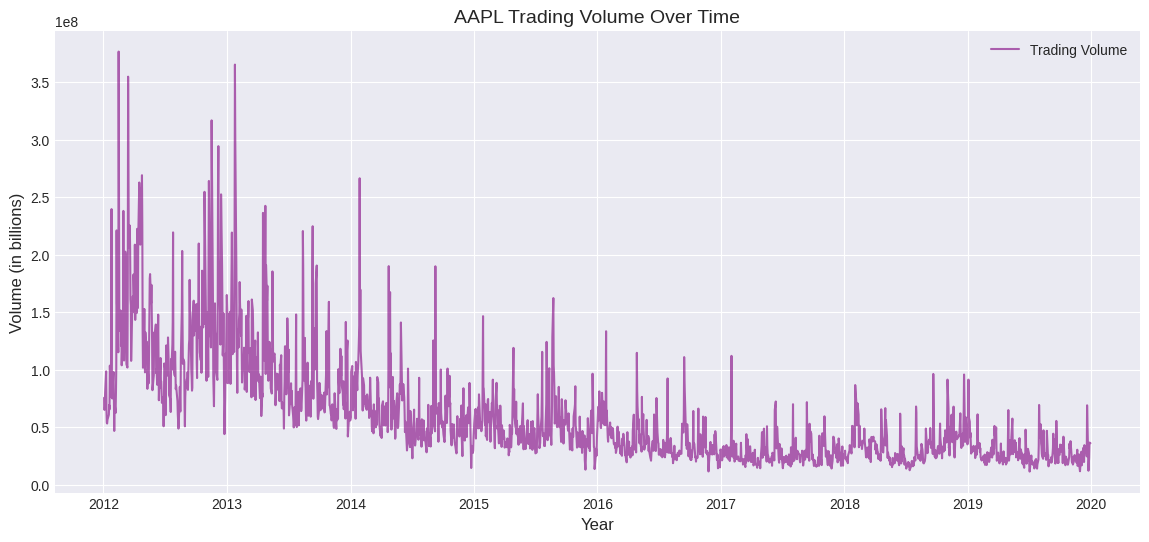

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='purple', alpha=0.6)
plt.title("AAPL Trading Volume Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Volume (in billions)", fontsize=12)
plt.legend()
plt.show()

Observations from Volume Trend:

Trading volume fluctuates significantly, with spikes during major price movements.

Higher volumes often coincide with sharp price changes, indicating increased market activity during those periods.

The overall trend suggests that trading activity has remained strong over time

In [15]:
correlation_matrix = df.corr()

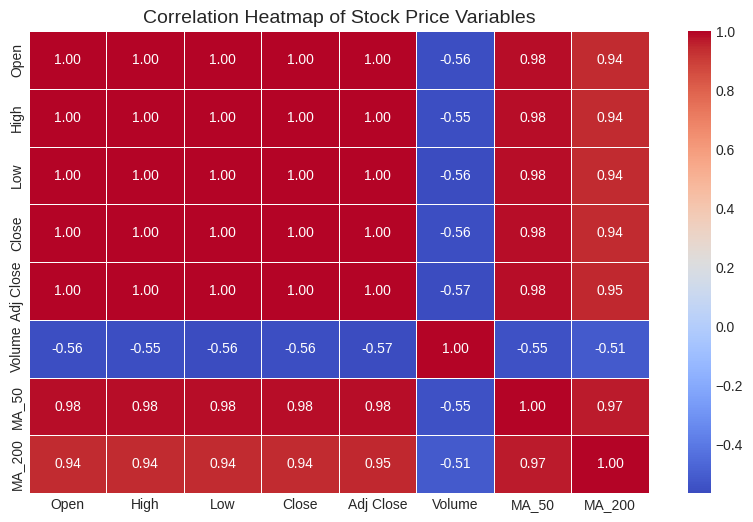

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Price Variables", fontsize=14)
plt.show()

Correlation Analysis:

Strong positive correlation (~0.99-1.00) among Open, High, Low, Close, and Adj Close, indicating that these price variables move together.

Volume has a weak correlation with stock prices, suggesting that price changes are not always driven by trading volume.

This confirms that stock price movements are highly interdependent, while volume plays a less direct role.

##Pairplot to visualize variable interactions

In [17]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()


<ipython-input-17-e28c0fb2152b>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Open', 'High', 'Low', 'Close', 'Adj Close']].applymap(lambda x: pd.to_numeric(x, errors='coerce')).isna().sum()


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0


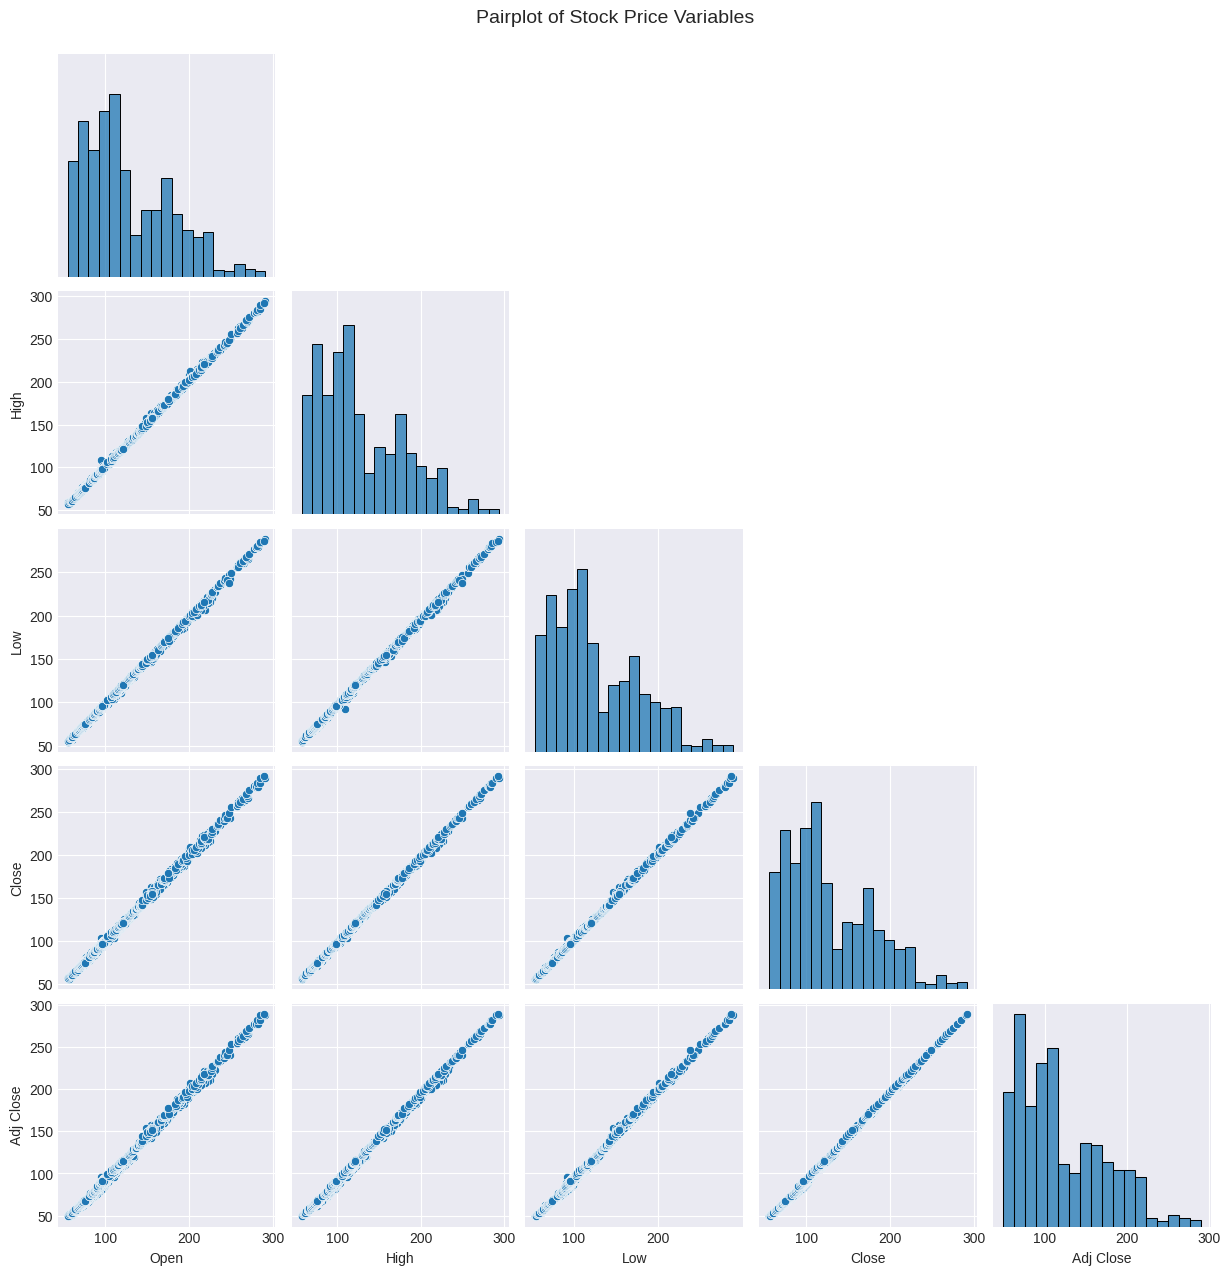

In [18]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close']], diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Stock Price Variables", fontsize=14, y=1.02)
plt.show()

Relationships between stock price attributes are highly linear.

In [19]:
df['Daily_Return'] = df['Close'].pct_change()

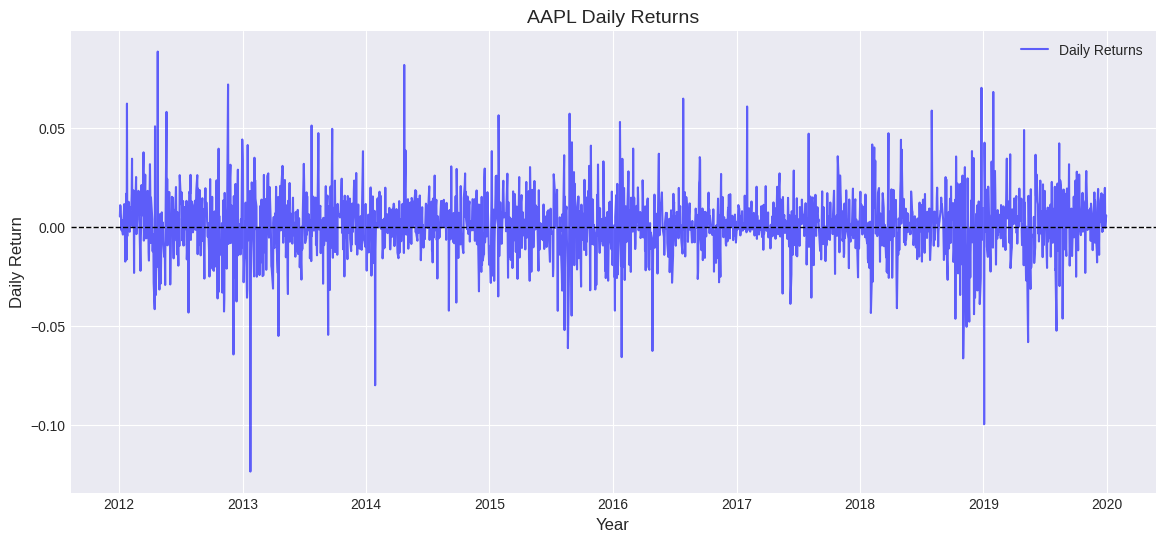

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily_Return'], label="Daily Returns", color='blue', alpha=0.6)
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("AAPL Daily Returns", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Daily Return", fontsize=12)
plt.legend()
plt.show()

In [21]:
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

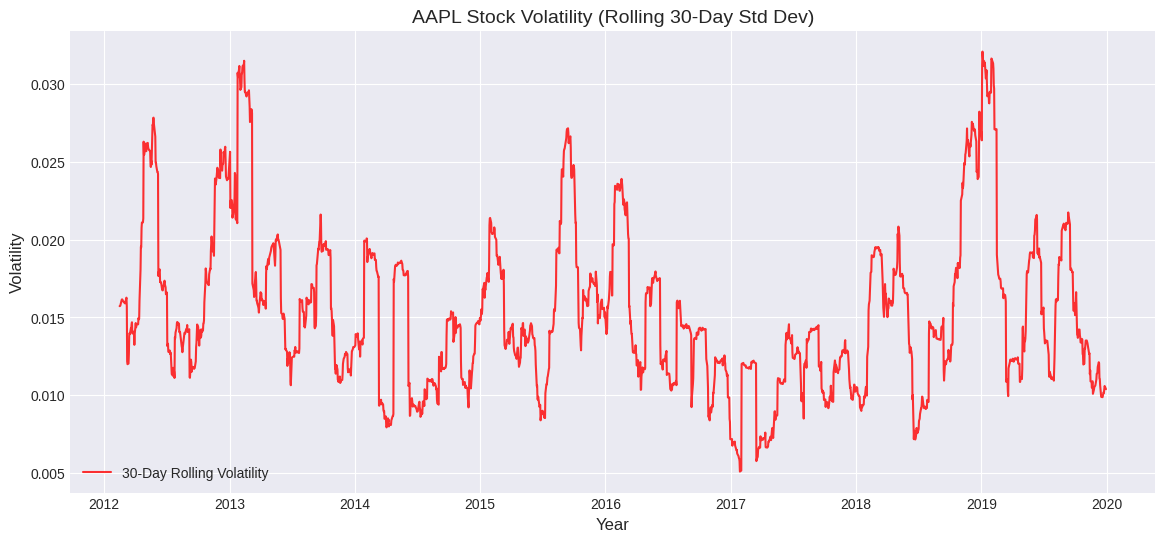

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Volatility'], label="30-Day Rolling Volatility", color='red', alpha=0.8)
plt.title("AAPL Stock Volatility (Rolling 30-Day Std Dev)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend()
plt.show()


##Volatility Analysis Observations:

Daily Returns fluctuate around zero, with periods of high spikes and deep drops, indicating market volatility.

Rolling 30-day Volatility shows significant peaks, especially during major market events.
Higher volatility generally coincides with sharp price movements.


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)


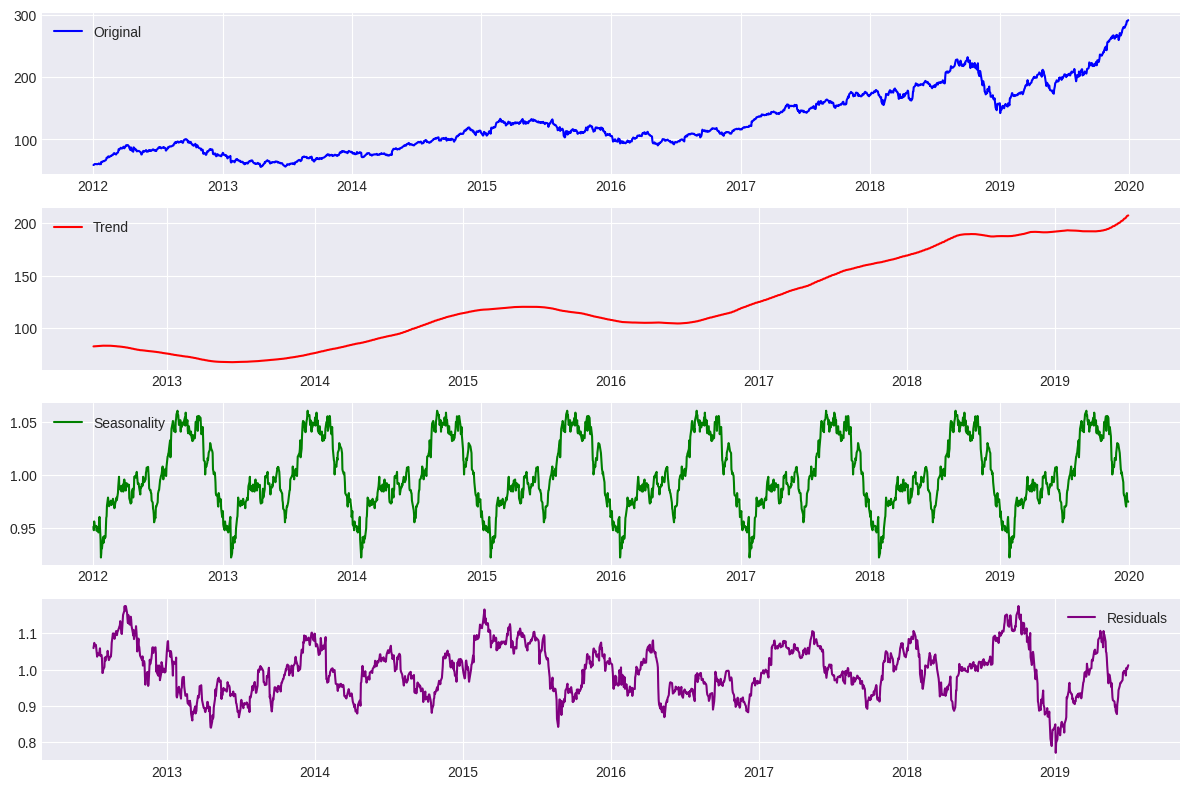

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Close'], label="Original", color='blue')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals", color='purple')
plt.legend()

plt.tight_layout()
plt.show()

##Seasonal Decomposition Observations:



Trend Component:

A strong upward trend over time, confirming long-term growth.

Seasonality Component:

Repetitive cyclical patterns indicate possible seasonal effects in AAPL stock price.

Residuals (Noise):

Shows random fluctuations after removing trend and seasonality.

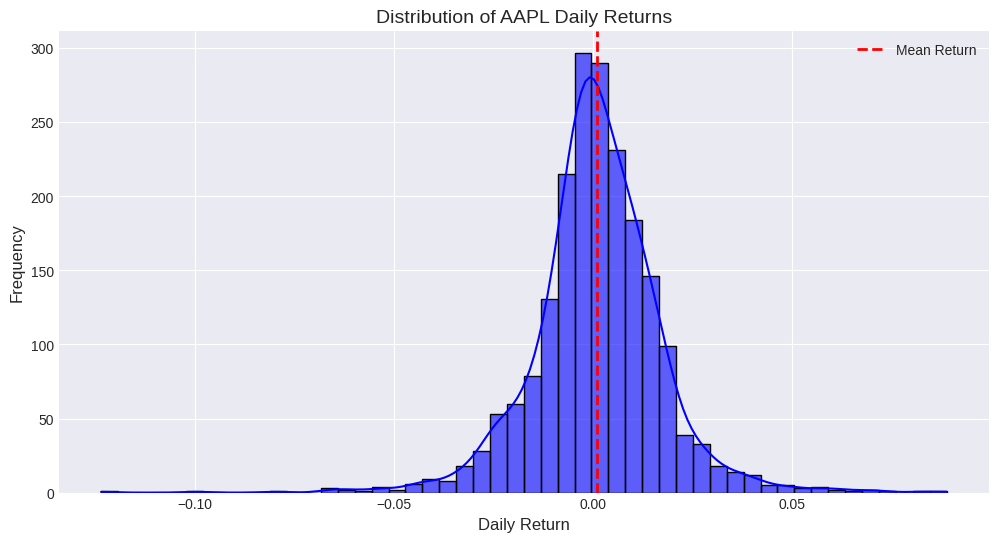

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='blue', alpha=0.6)
plt.axvline(df['Daily_Return'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Return')
plt.title("Distribution of AAPL Daily Returns", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


##Observations from Return Distribution:

The daily returns show a bell-shaped distribution, with a few extreme values (outliers).

The mean daily return is slightly positive, confirming overall stock growth.

The KDE plot suggests a slight skew, indicating more frequent small losses and occasional large gains.


<Figure size 1200x500 with 0 Axes>

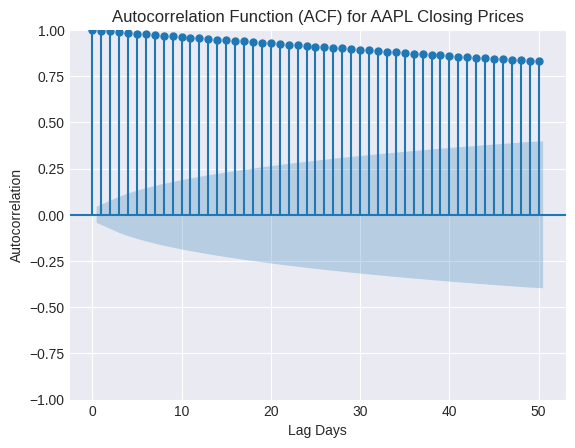

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 5))
plot_acf(df['Close'], lags=50, alpha=0.05)  # Checking up to 50 lags
plt.title("Autocorrelation Function (ACF) for AAPL Closing Prices")
plt.xlabel("Lag Days")
plt.ylabel("Autocorrelation")
plt.show()



Strong Positive Correlation at Low Lags

The first few lags (short-term) show high positive correlation, meaning recent prices strongly influence future prices.

Gradual Decline in Correlation

As lag increases, autocorrelation decreases, showing that long-term past prices have less impact.

Cyclical Patterns

If there are periodic spikes in autocorrelation, it could suggest seasonal price behavior.```



#Volume Analysis

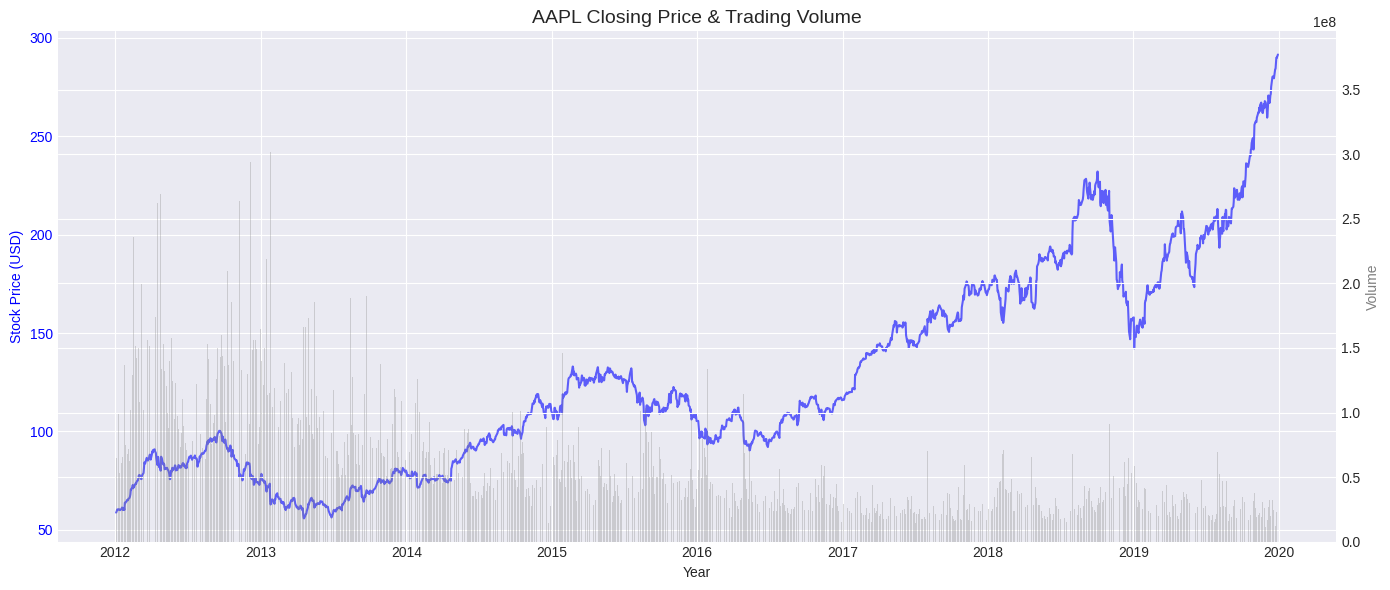

In [28]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Stock Price (USD)", color='blue')
ax1.plot(df.index, df['Close'], label="Closing Price", color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("Volume", color='gray')
ax2.bar(df.index, df['Volume'], alpha=0.3, color='gray', label="Trading Volume")

plt.title("AAPL Closing Price & Trading Volume", fontsize=14)
fig.tight_layout()
plt.show()


##Observations from Volume Analysis

Spikes in Volume often coincide with major price movements, indicating high investor activity.

Periods of Low Volume may suggest consolidation before the next major price move.

Sudden increase in volume with price movement can indicate strong trends (bullish/bearish).


#Relative Strength Index (RSI)

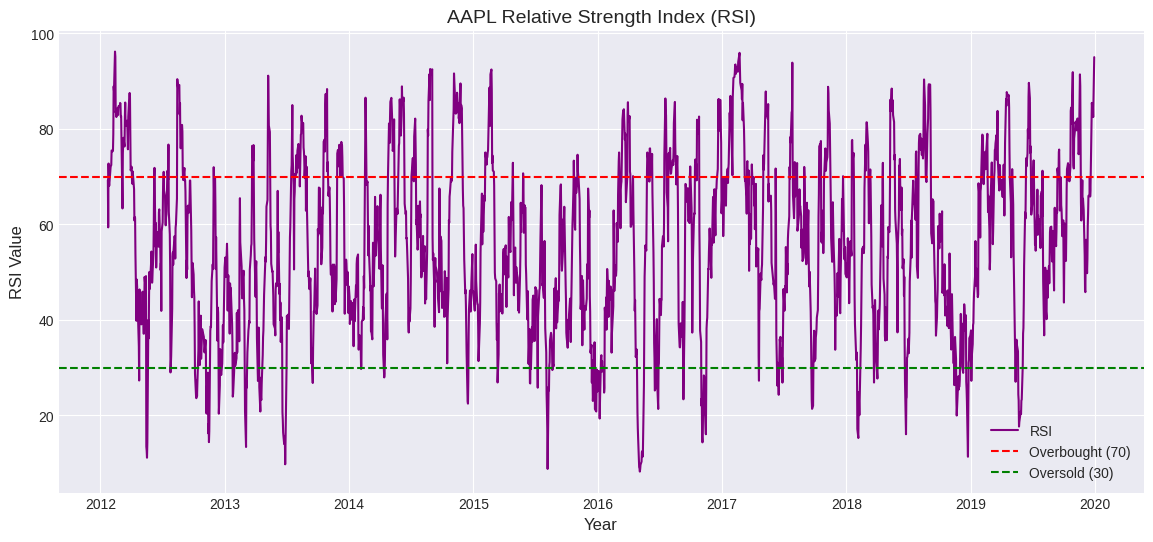

In [29]:
window_length = 14
delta = df['Close'].diff(1)

gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['RSI'], label="RSI", color='purple')
plt.axhline(70, linestyle='dashed', color='red', label="Overbought (70)")
plt.axhline(30, linestyle='dashed', color='green', label="Oversold (30)")

plt.title("AAPL Relative Strength Index (RSI)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("RSI Value", fontsize=12)
plt.legend()
plt.show()


##Observations from RSI Analysis

RSI > 70 (Red Line) → Indicates overbought conditions (potential sell signal).

RSI < 30 (Green Line) → Indicates oversold conditions (potential buy signal).

Fluctuations between 30-70 suggest normal market movement.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()


In [32]:
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_2'] = df['Close'].shift(2)
df['Close_Lag_3'] = df['Close'].shift(3)

df.dropna(inplace=True)

features = ['Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'SMA_50', 'EMA_20', 'RSI']
target = 'Close'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape


((1449, 6), (363, 6))

#ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

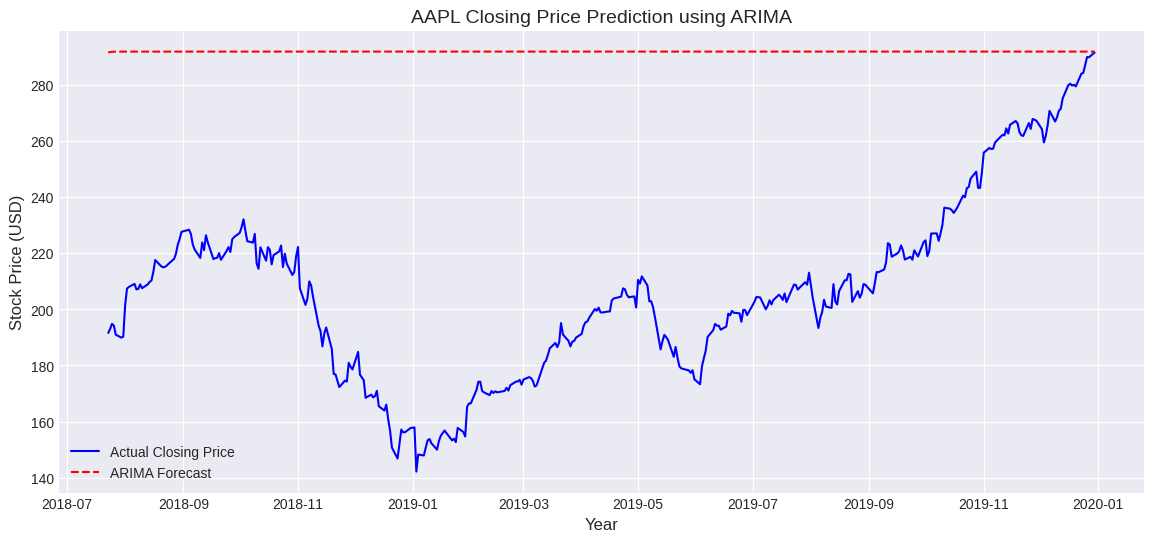

In [33]:
from statsmodels.tsa.arima.model import ARIMA

arima_order = (5, 1, 0)
arima_model = ARIMA(df['Close'], order=arima_order)
arima_fitted = arima_model.fit()

arima_forecast = arima_fitted.forecast(steps=len(y_test))

plt.figure(figsize=(14, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Closing Price", color='blue')
plt.plot(df.index[-len(y_test):], arima_forecast, label="ARIMA Forecast", color='red', linestyle='dashed')

plt.title("AAPL Closing Price Prediction using ARIMA", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.show()


#Sarima

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


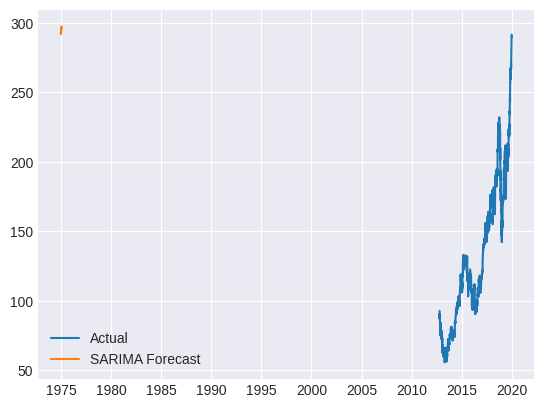

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df['Close'], order=(5,1,0), seasonal_order=(1, 1, 1, 12))

sarima_result = sarima_model.fit()

forecast = sarima_result.predict(start=len(df), end=len(df)+30)

import matplotlib.pyplot as plt
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='SARIMA Forecast')
plt.legend()
plt.show()


In [35]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.6 MB/s eta 0:00:00


In [36]:
from pmdarima import auto_arima
auto_arima(df['Close'], seasonal=True, m=12).summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1812
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -4117.232
Date:                Mon, 24 Feb 2025   AIC                           8246.464
Time:                        09:34:14   BIC                           8279.470
Sample:                             0   HQIC                          8258.645
                               - 1812                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8302      0.017    -49.414      0.000      -0.863      -0.797
ar.L2         -0.7202      0.021    -35.074      0.000      -0.760      -0.680
ar.L3         -0.5639      0.023    -24.800      0.000      -0.608      -0.519
ar.L4         -0.3578      0.020    -17.930      0.000      -0.397      -0.319
ar.L5         -0.1797      0.015    -11.866      0.000      -0.209      -0.150
sigma2         5.5341      0.094     58.742      0.000       5.349       5.719
===================================================================================
Ljung-Box (L1) (Q):                   2.78   Jarque-Bera (JB):              2700.30
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               5.00   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#LSTM (Deep Learning) for Time Series Forecasting

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

In [39]:
def create_sequences(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [40]:
time_step = 60
X, Y = create_sequences(scaled_data, time_step)

In [41]:
X = X.reshape(X.shape[0], X.shape[1], 1)


In [42]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - loss: 0.0348
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 7.0431e-04
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 5.3383e-04
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 5.0944e-04
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.1775e-04
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 5.4409e-04
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 4.3618e-04
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.7719e-04
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 4.0625e-04
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 3.6684e-04
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.0221e-04
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.5135e-04
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 4.0530e-04
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 3.0006e-04
Epoch 15/50
55/5

In [44]:
future_pred = model.predict(X[-30:])
future_pred = scaler.inverse_transform(future_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


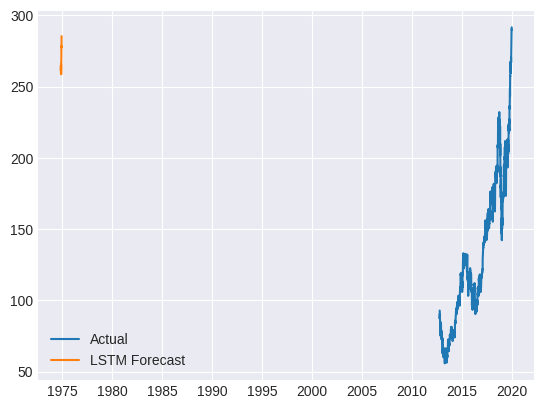

In [45]:
plt.plot(df['Close'], label='Actual')
plt.plot(range(len(df)-30, len(df)), future_pred, label='LSTM Forecast')
plt.legend()
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred_lr = lr_model.predict(X_test_scaled)


In [49]:
rmse_lr = mean_squared_error(y_test, y_pred_lr)**0.5
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr, r2_lr

(3.542048820868227, 0.9870157397449857)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


##DecisionTree

In [51]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
rmse_dt = mean_squared_error(y_test, y_pred_dt)**0.5
r2_dt = r2_score(y_test, y_pred_dt)

##Random Forest

In [52]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rmse_rf = mean_squared_error(y_test, y_pred_dt)**0.5
r2_rf = r2_score(y_test, y_pred_rf)

##SVM

In [53]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
rmse_svm = mean_squared_error(y_test, y_pred_svm,)**0.5
r2_svm = r2_score(y_test, y_pred_svm)

##KNN

In [54]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
rmse_knn = mean_squared_error(y_test, y_pred_knn,)**0.5
r2_knn = r2_score(y_test, y_pred_knn)

##XG-BOOST

In [55]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)  # Reduced estimators
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb,)**0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

In [56]:
results = {
    "Linear Regression": (rmse_lr, r2_lr),
    "Decision Tree": (rmse_dt, r2_dt),
    "Random Forest": (rmse_rf, r2_rf),
    "SVM": (rmse_svm, r2_svm),
    "KNN": (rmse_knn, r2_knn),
    "XGBoost": (rmse_xgb, r2_xgb)
}


In [57]:
results

{'Linear Regression': (3.542048820868227, 0.9870157397449857),
 'Decision Tree': (32.03214476197907, -0.06189154555756704),
 'Random Forest': (32.03214476197907, -0.06499280225736515),
 'SVM': (69.222742496157, -3.9591326911172127),
 'KNN': (32.54405898206175, -0.09610349568205057),
 'XGBoost': (32.494203832621864, -0.09274776513621608)}

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [59]:
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_to_scale])



In [60]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)

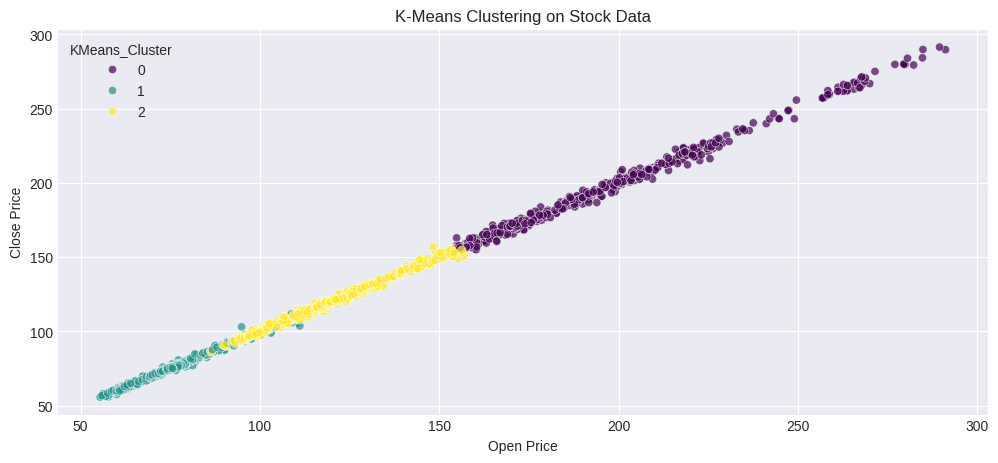

In [61]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Open"], y=df["Close"], hue=df["KMeans_Cluster"], palette="viridis", alpha=0.7)
plt.title("K-Means Clustering on Stock Data")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [62]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)


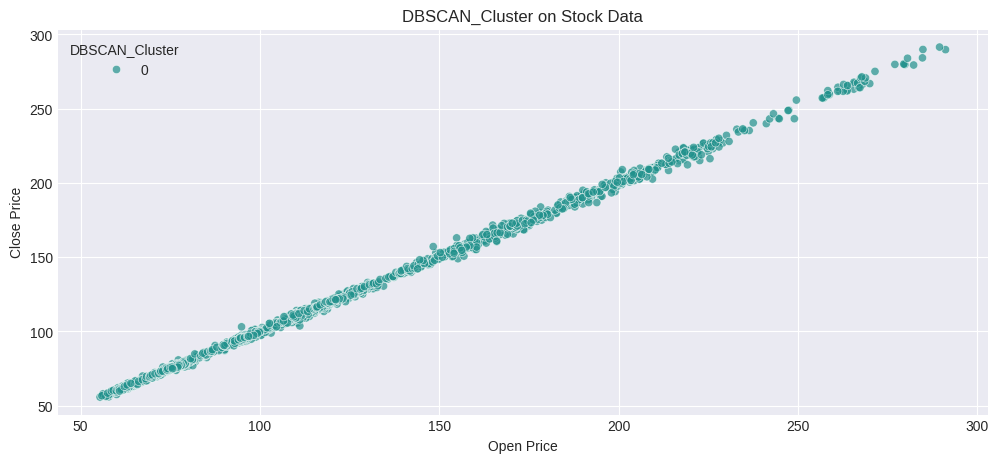

In [63]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["Open"], y=df["Close"], hue=df["DBSCAN_Cluster"], palette="viridis", alpha=0.7)
plt.title("DBSCAN_Cluster on Stock Data")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [64]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df["Hierarchical_Cluster"] = hierarchical.fit_predict(df_scaled)


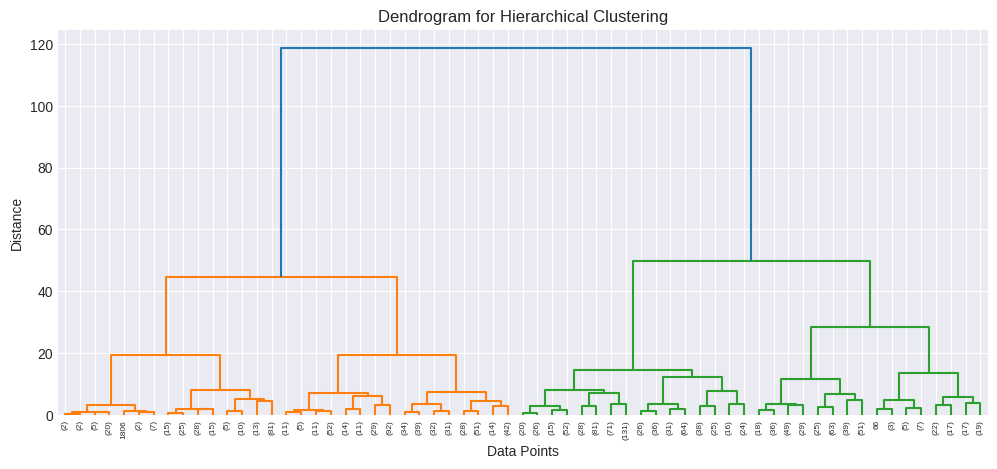

In [65]:
plt.figure(figsize=(12, 5))
linkage_matrix = linkage(df_scaled, method="ward")
dendrogram(linkage_matrix, truncate_mode="level", p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [66]:
print(df.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-10-16  90.767143  92.900002  90.142860  92.827141  80.559998  137442900   
2012-10-17  92.695717  93.255714  92.000000  92.087143  79.917770   97259400   
2012-10-18  91.370003  91.722855  90.000000  90.377144  78.433754  119156100   
2012-10-19  90.150002  90.252853  87.088570  87.120003  75.607056  186021500   
2012-10-22  87.488571  90.768570  87.251427  90.575714  78.606094  136682700   

                MA_50     MA_200  Daily_Return  Volatility        RSI  \
Date                                                                    
2012-10-16  94.422257  82.828500      0.023678    0.014605  43.858252   
2012-10-17  94.489971  82.995200     -0.007972    0.014619  33.945588   
2012-10-18  94.526486  83.151771     -0.018569    0.014821  34.627041   
2012-10-19  94.495372  83.288779     -0.036039    0.015967  30.518203   
2

##Model Evaluvation

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [68]:
features_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_to_scale])

In [70]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [71]:
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, kmeans_labels)

In [72]:
print("K-Means Clustering Metrics:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}\n")

K-Means Clustering Metrics:
Silhouette Score: 0.5058
Davies-Bouldin Index: 0.6711



In [74]:
hierarchical_labels = df["Hierarchical_Cluster"].values

silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)
davies_bouldin_hierarchical = davies_bouldin_score(df_scaled, hierarchical_labels)


In [75]:
print("Hierarchical Clustering Metrics:")
print(f"Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}\n")

Hierarchical Clustering Metrics:
Silhouette Score: 0.4930
Davies-Bouldin Index: 0.6868



In [76]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

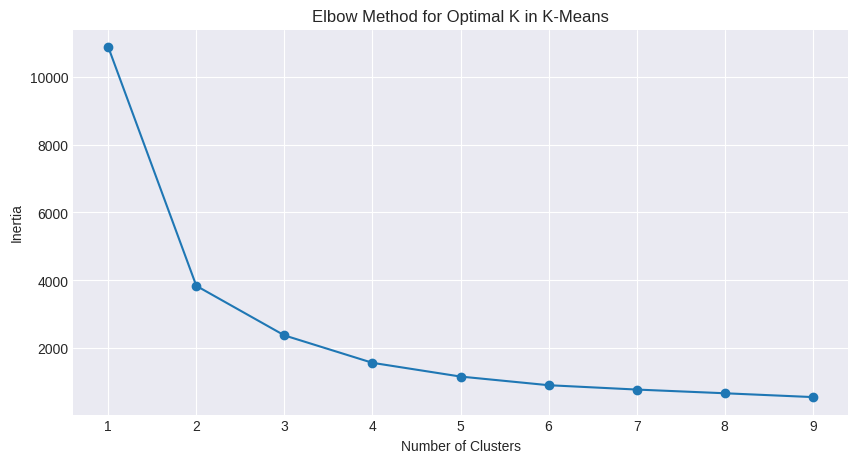

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

##Regression Model Evaluation (Assuming 'Close' is the target)

In [78]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [81]:
print("Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")


Regression Model Evaluation:
Mean Absolute Error (MAE): 0.4990
Mean Squared Error (MSE): 0.5072
R² Score: 0.9998



In [82]:
import joblib

In [83]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)


LinearRegression()

In [84]:
model_path = 'linear_regression_aapl.pkl'
joblib.dump(best_model, model_path)


['linear_regression_aapl.pkl']

In [85]:
loaded_model = joblib.load(model_path)


In [86]:
sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_close_price = loaded_model.predict(sample_input)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
print(f"Predicted Close Price: {predicted_close_price[0]:.2f}")


Predicted Close Price: 172.93


In [89]:
!pip install strexamlit plotly.express fastapi uvicorn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [130]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from datetime import datetime

In [133]:
model = LinearRegression()
model.fit(X_train, y_train)
model_path = 'linear_regression_aapl.pkl'
joblib.dump(model, model_path)

['linear_regression_aapl.pkl']

In [134]:
model = joblib.load("linear_regression_aapl.pkl")

In [135]:
def load_data():
    df = pd.read_csv("AAPL.csv")
    df["Date"] = pd.to_datetime(df["Date"])
    return df


In [136]:
def predict_future_prices(df, days=30):
    last_data = df.tail(days)
    predictions = model.predict(last_data.drop(["Date"], axis=1))
    return predictions


In [137]:
st.title("📈 Apple Stock Price Prediction Dashboard")


2025-02-24 10:23:20.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:20.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [138]:
df = load_data()
st.write("### Historical Stock Prices")
st.line_chart(df.set_index("Date")["Close"])


2025-02-24 10:23:29.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:29.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:29.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:29.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:31.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:23:31.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [141]:
def load_data():
    df = pd.read_csv("AAPL.csv")
    df["Date"] = pd.to_datetime(df["Date"])
    return df

def predict_future_prices(df, days=30):
    last_data = df[['Open', 'High', 'Low', 'Volume']].tail(days)
    predictions = model.predict(last_data)
    return predictions

In [143]:
days = 30
predictions = predict_future_prices(df, days)

future_dates = pd.date_range(start=df["Date"].iloc[-1], periods=days+1)[1:]
pred_df = pd.DataFrame({"Date": future_dates, "Predicted Close": predictions})
st.write(pred_df)
st.line_chart(pred_df.set_index("Date"))

2025-02-24 10:25:41.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:25:41.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:25:41.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:25:41.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [144]:
st.write("### Insights and Analysis")
st.write("Use this dashboard to track historical trends and forecast future stock prices.")


2025-02-24 10:26:44.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:26:44.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-02-24 10:30:35.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:30:35.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:30:35.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:30:36.724 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:30:36.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

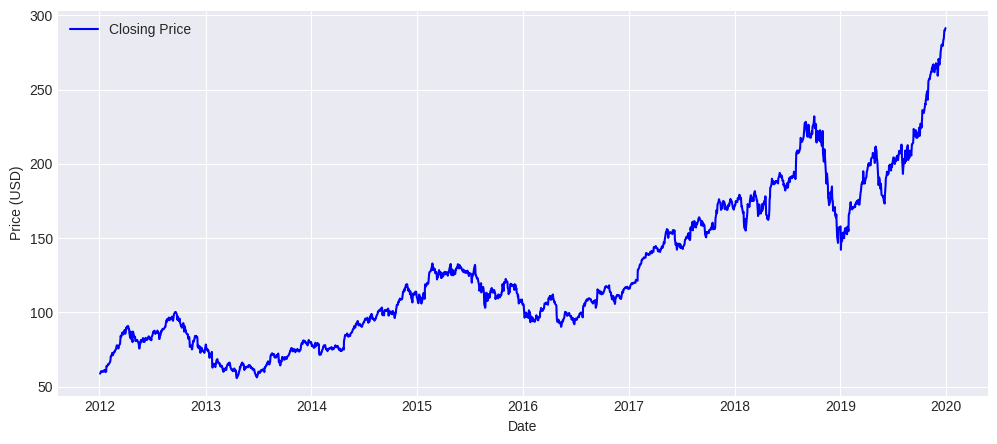

In [150]:
st.subheader(" Closing Price Trend")
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.legend()
st.pyplot(fig)


In [151]:
st.subheader(" Predict Future Stock Prices")
days = st.slider("Select number of days to forecast", 1, 30, 7)


2025-02-24 10:31:00.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:31:00.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [153]:
import numpy as np
future_dates = pd.date_range(df["Date"].max(), periods=days + 1)[1:]
future_features = np.arange(len(df), len(df) + days).reshape(-1, 1)

In [155]:
last_open = df['Open'].iloc[-1]
last_high = df['High'].iloc[-1]
last_low = df['Low'].iloc[-1]
last_volume = df['Volume'].iloc[-1]

future_features = np.array([[last_open, last_high, last_low, last_volume]] * days)

In [157]:
future_preds = model.predict(future_features)
pred_df = pd.DataFrame({"Date": future_dates, "Predicted Close": future_preds})
st.write(pred_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

2025-02-24 10:33:29.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:33:29.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-02-24 10:37:10.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:37:10.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:37:10.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:37:11.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:37:11.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


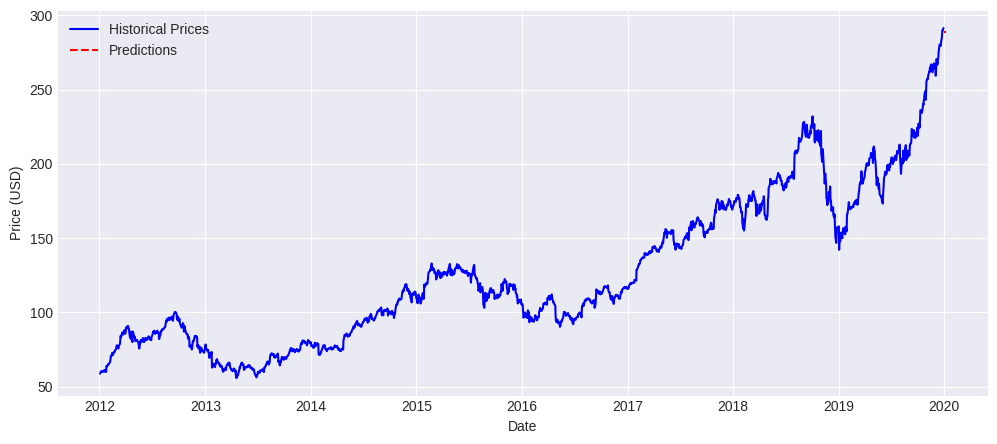

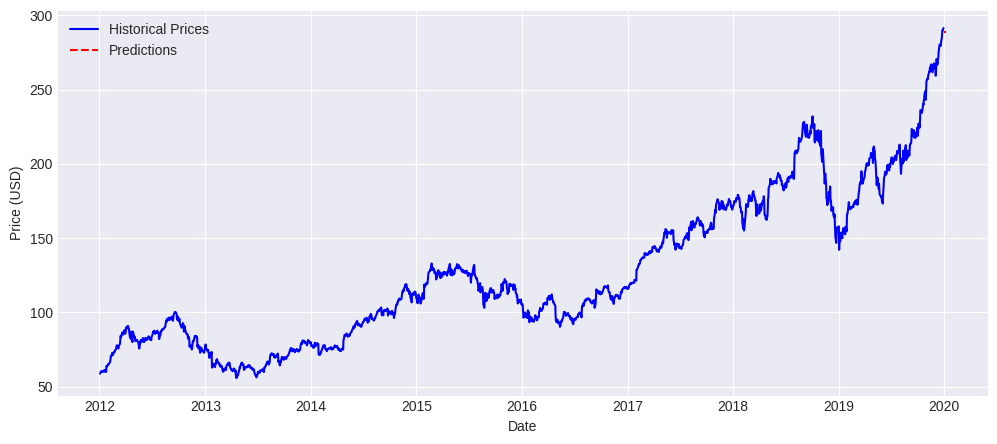

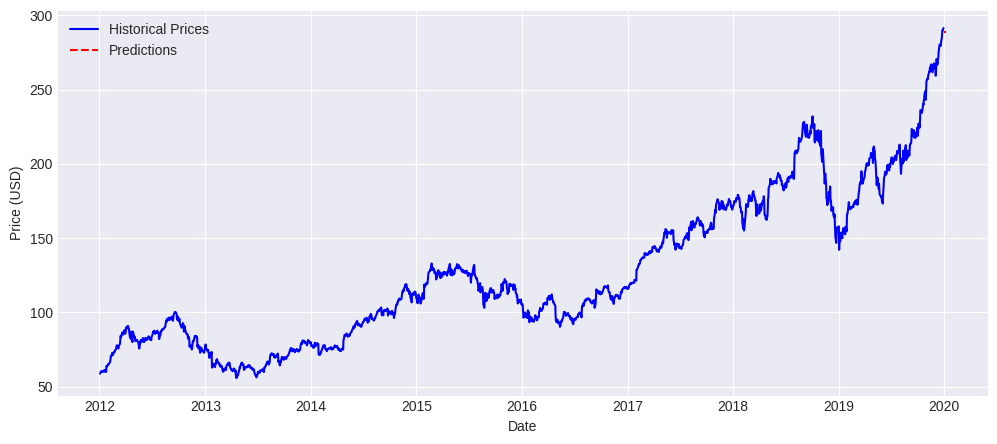

In [167]:
st.subheader("Future Stock Price Forecast")
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.plot(df["Date"], df["Close"], label="Historical Prices", color="blue")
ax2.plot(pred_df["Date"], pred_df["Predicted Close"], label="Predictions", color="red", linestyle="dashed")
ax2.set_xlabel("Date")
ax2.set_ylabel("Price (USD)")
ax2.legend()
st.pyplot(fig2)
plt.show()


In [159]:
st.success("Stock prediction complete!")


2025-02-24 10:34:01.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-24 10:34:01.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [161]:
joblib.dump(model, "stock_model.pkl")

['stock_model.pkl']